In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tree_functions as tree
import imp
plt.style.use('seaborn')
import statistics
import numpy as np
import scipy.stats as st

In [10]:
# plt.style.use('seaborn-talk')

In [11]:
galton = pd.read_csv('galton_height.csv')

In [12]:
galton

,Family,Father,Mother,Gender,Height,Kids
0,1,78.5,67.0,M,73.2,4
1,1,78.5,67.0,F,69.2,4
2,1,78.5,67.0,F,69.0,4
3,1,78.5,67.0,F,69.0,4
4,2,75.5,66.5,M,73.5,4
...,...,...,...,...,...,...
893,136A,68.5,65.0,M,68.5,8
894,136A,68.5,65.0,M,67.7,8
895,136A,68.5,65.0,F,64.0,8
896,136A,68.5,65.0,F,63.5,8


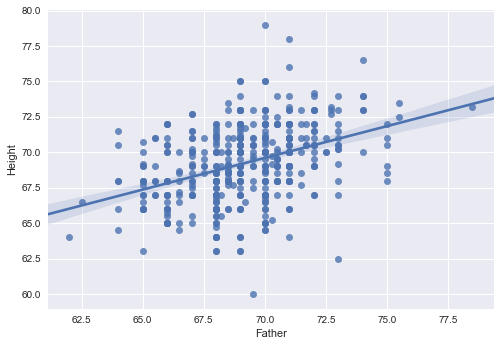

In [13]:
sns.regplot(galton.loc[galton.Gender == 'M'].Father, galton.loc[galton.Gender == 'M'].Height)

In [14]:
galton.loc[galton.Gender == 'M'].Father.corr(galton.loc[galton.Gender == 'M'].Height)

0.3913173581417897

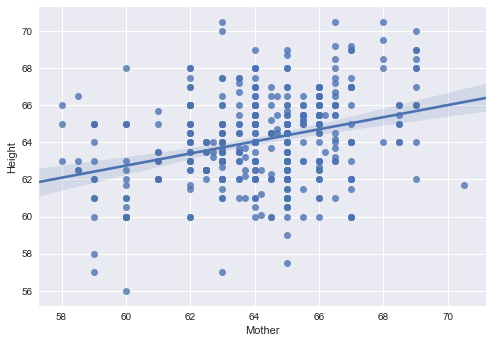

In [15]:
sns.regplot(galton.loc[galton.Gender == 'F'].Mother, galton.loc[galton.Gender == 'F'].Height)

In [16]:
galton.loc[galton.Gender == 'F'].Mother.corr(galton.loc[galton.Gender == 'F'].Height)

0.313698353531348

In [17]:
galton

,Family,Father,Mother,Gender,Height,Kids
0,1,78.5,67.0,M,73.2,4
1,1,78.5,67.0,F,69.2,4
2,1,78.5,67.0,F,69.0,4
3,1,78.5,67.0,F,69.0,4
4,2,75.5,66.5,M,73.5,4
...,...,...,...,...,...,...
893,136A,68.5,65.0,M,68.5,8
894,136A,68.5,65.0,M,67.7,8
895,136A,68.5,65.0,F,64.0,8
896,136A,68.5,65.0,F,63.5,8


In [18]:
def normalize(row):
    if row.Gender == 'M':
        return (row.Height - son_mean) / son_sd
    elif row.Gender == 'F':
        return (row.Height - daughter_mean) / daughter_sd

In [19]:
# no multi-counting
father_distribution = galton.groupby(['Family'], sort=False).Father.mean()
mother_distribution = galton.groupby(['Family'], sort=False).Mother.mean()

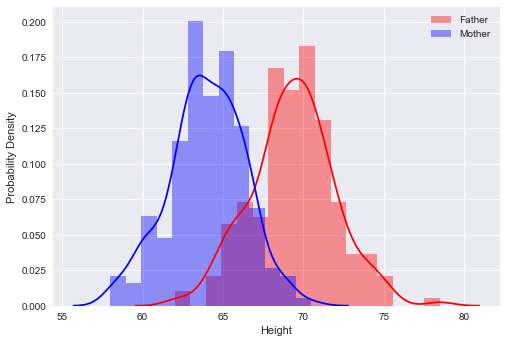

In [20]:
sns.distplot(father_distribution, label='Father', color='red')
sns.distplot(mother_distribution, label='Mother', color='blue')
plt.xlabel('Height')
plt.ylabel('Probability Density')
plt.legend()
plt.show()

### Parent descriptors

In [21]:
# true values, no multi-counting
print(father_distribution.mean(), father_distribution.std())  
print(mother_distribution.mean(), mother_distribution.std())

69.34923857868021 2.622034170789886
63.98426395939087 2.3556068786418183


In [22]:
# counts multiple times (as many as the number of offspring)
father_mean = galton.Father.mean()  
father_sd = galton.Father.std()

In [23]:
print(father_mean, father_sd)

69.23285077950997 2.4702558107108206


In [24]:
mother_mean = galton.Mother.mean()
mother_sd = galton.Mother.std()

In [25]:
print(mother_mean, mother_sd)

64.08440979955456 2.3070252210018625


### Offspring descriptors

In [26]:
son_distribution = galton.loc[galton.Gender == 'M'].Height
daughter_distribution = galton.loc[galton.Gender == 'F'].Height

In [27]:
son_mean = galton.loc[galton.Gender == 'M'].Height.mean()
son_sd = galton.loc[galton.Gender == 'M'].Height.std()

In [28]:
print(son_mean, son_sd)

69.22881720430114 2.6315942826866188


In [29]:
daughter_mean = galton.loc[galton.Gender == 'F'].Height.mean()
daughter_sd = galton.loc[galton.Gender == 'F'].Height.std()

In [30]:
print(daughter_mean, daughter_sd)

64.11016166281759 2.370319602944069


### Naive offspring r sub s

In [31]:
# standard deviations of the individual distributions
son_sds = galton.loc[galton.Gender == 'M'].groupby(['Family'], sort=False).Height.std()
daughter_sds = galton.loc[galton.Gender == 'F'].groupby(['Family'], sort=False).\
                        Height.std()

In [32]:
son_sds.mean(), son_sds.median()

(1.6928601601893907, 1.5275252316519485)

In [33]:
daughter_sds.mean(), daughter_sds.median()

(1.4968470911127525, 1.4142135623730951)

In [34]:
son_sds.mean() / father_sd

0.6852975116379818

In [35]:
daughter_sds.mean() / mother_sd

0.6488212948373069

In [36]:
galton_norm = pd.DataFrame()

galton_norm = pd.DataFrame((galton['Father'] - father_mean) / father_sd)

galton_norm['Mother'] = (galton['Mother'] - mother_mean) / mother_sd

galton_norm['Parent'] = (galton_norm.Father + galton_norm.Mother) / 2
galton_norm['Offspring'] = galton.apply(normalize, axis='columns')

### Normalized offspring r sub s (includes male and female offspring)

In [37]:
galton['NormHeight'] = galton.apply(normalize, axis='columns')

In [38]:
offspring_sds = galton.groupby(['Family'], sort=False).NormHeight.std()

In [39]:
offspring_sds.median(), offspring_sds.mean()

(0.6692042056467554, 0.6873125038392203)

In [40]:
galton_norm.Parent.std()

0.7326884096058295

In [41]:
offspring_sds.median() / galton_norm.Parent.std()

0.9133544312605857

In [42]:
offspring_sds.mean() / galton_norm.Parent.std()

0.9380693004397047

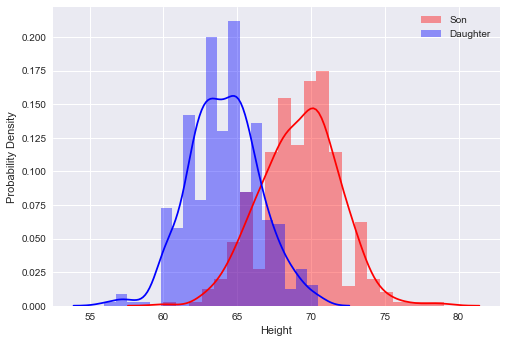

In [43]:
sns.distplot(son_distribution, label='Son', color='red')
sns.distplot(daughter_distribution, label='Daughter', color='blue')
plt.xlabel('Height')
plt.ylabel('Probability Density')
plt.legend()
plt.show()

In [44]:
len(galton.Family.unique())

197

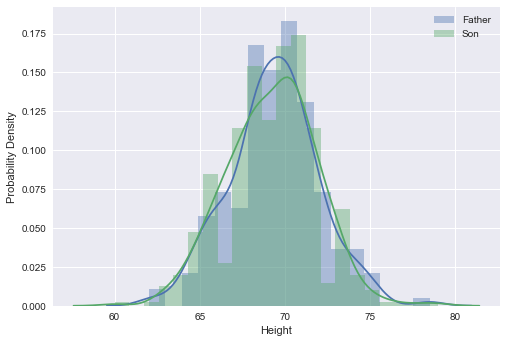

In [45]:
sns.distplot(father_distribution, label='Father')
sns.distplot(son_distribution, label='Son')
plt.xlabel('Height')
plt.ylabel('Probability Density')
plt.legend()
plt.show()

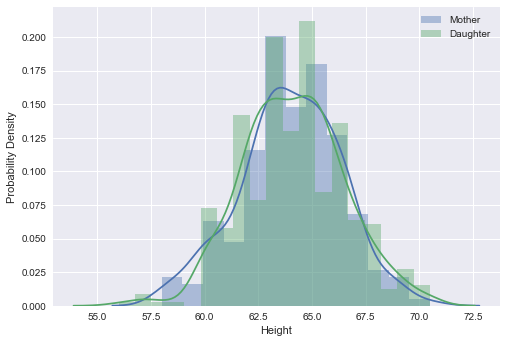

In [46]:
sns.distplot(mother_distribution, label='Mother')
sns.distplot(daughter_distribution, label='Daughter')
plt.xlabel('Height')
plt.ylabel('Probability Density')
plt.legend()
plt.show()

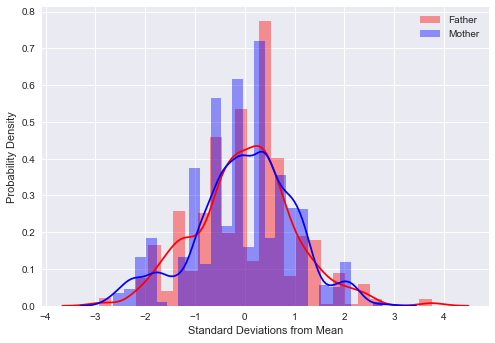

In [47]:
sns.distplot(galton_norm.Father, label='Father', color='red')
sns.distplot(galton_norm.Mother, label='Mother', color='blue')
plt.xlabel('Standard Deviations from Mean')
plt.ylabel('Probability Density')
plt.legend()
plt.show()

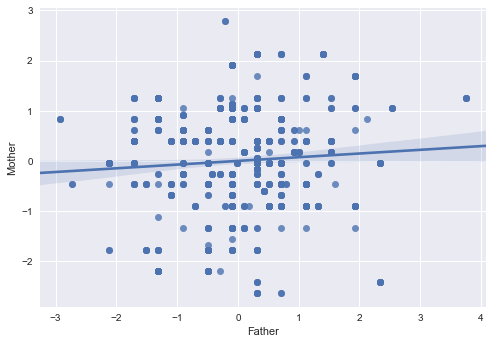

In [94]:
plt.xlabel('Father z-score')
plt.ylabel('Mother z-score')
sns.regplot(galton_norm.Father, galton_norm.Mother)
plt.show()

In [49]:
galton_norm

,Father,Mother,Parent,Offspring
0,3.751494,1.263788,2.507641,1.509041
1,3.751494,1.263788,2.507641,2.147322
2,3.751494,1.263788,2.507641,2.062945
3,3.751494,1.263788,2.507641,2.062945
4,2.537045,1.047058,1.792052,1.623040
...,...,...,...,...
893,-0.296670,0.396870,0.050100,-0.276949
894,-0.296670,0.396870,0.050100,-0.580947
895,-0.296670,0.396870,0.050100,-0.046475
896,-0.296670,0.396870,0.050100,-0.257417


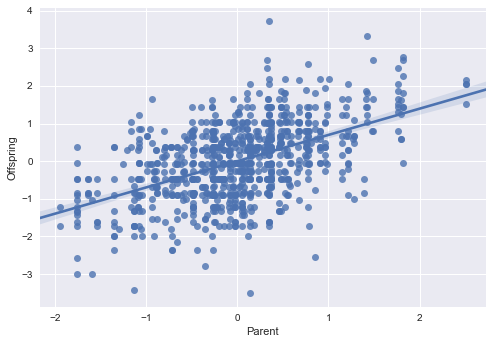

In [50]:
sns.regplot(galton_norm.Parent, galton_norm.Offspring)

In [51]:
galton_norm.corr()

,Father,Mother,Parent,Offspring
Father,1.000000,0.073665,0.732688,0.424994
Mother,0.073665,1.000000,0.732688,0.324175
Parent,0.732688,0.732688,1.000000,0.511247
Offspring,0.424994,0.324175,0.511247,1.000000


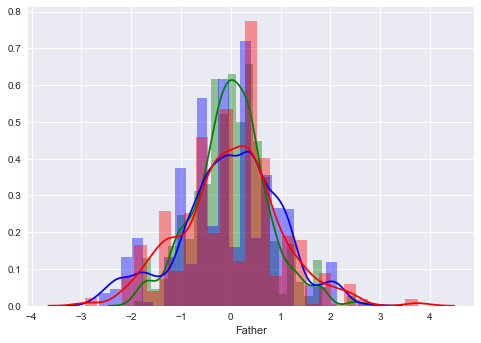

In [52]:
sns.distplot(galton_norm.Parent, color='green')
sns.distplot(galton_norm.Mother, color='blue')
sns.distplot(galton_norm.Father, color='red')


In [53]:
print(
galton_norm.Parent.std(),
galton_norm.Mother.std(),
galton_norm.Father.std(),
galton_norm.Offspring.std())

0.7326884096058295 0.9999999999999896 1.000000000000001 0.9994424309574889


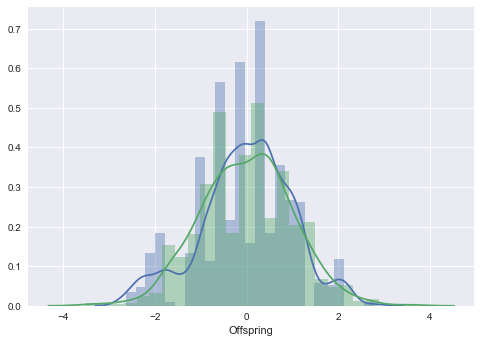

In [54]:
sns.distplot(galton_norm.Mother)
sns.distplot(galton_norm.Offspring)

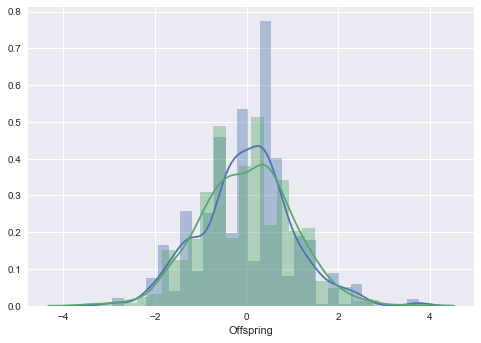

In [55]:
sns.distplot(galton_norm.Father)
sns.distplot(galton_norm.Offspring)

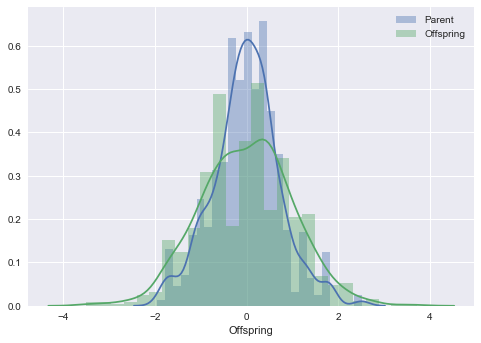

In [56]:
sns.distplot(galton_norm.Parent, label='Parent')
sns.distplot(galton_norm.Offspring, label='Offspring')
plt.legend()
plt.show()

In [57]:
print(galton_norm.Father.std(), 
galton_norm.Mother.std(),
galton_norm.Parent.std(),
galton_norm.Offspring.std())

1.000000000000001 0.9999999999999896 0.7326884096058295 0.9994424309574889


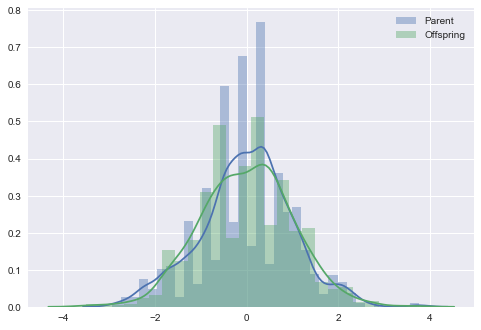

In [58]:
all_parents = galton_norm.Father.tolist() + galton_norm.Mother.tolist()
sns.distplot(all_parents, label='Parent')
sns.distplot(galton_norm.Offspring.tolist(), label='Offspring')
plt.legend()
plt.show()

In [59]:
statistics.stdev(galton_norm.Father.tolist() + galton_norm.Mother.tolist())

0.9997214096616756

In [60]:
statistics.stdev(galton_norm.Offspring)

0.9994424309574893

In [61]:
statistics.stdev(galton_norm.Parent)

0.7326884096058293

In [90]:
0.7326884096058293 ** 2

0.5368323055707195

Variance of the midparental phenotype distribution. 

In [62]:
father_distribution = np.array(father_distribution)
mother_distribution = np.array(mother_distribution)

In [63]:
norm_father_distribution = (father_distribution - father_distribution.mean()) / \
                            father_distribution.std()

norm_mother_distribution = (mother_distribution - mother_distribution.mean()) / \
                            mother_distribution.std()

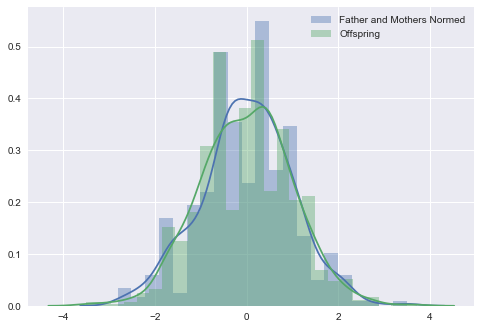

In [64]:
normed_fm_dist = norm_father_distribution.tolist() + norm_mother_distribution.tolist()

sns.distplot(normed_fm_dist, label='Father and Mothers Normed')
sns.distplot(galton_norm.Offspring.tolist(), label='Offspring')
plt.legend()
plt.show()

In [65]:
galton_norm

,Father,Mother,Parent,Offspring
0,3.751494,1.263788,2.507641,1.509041
1,3.751494,1.263788,2.507641,2.147322
2,3.751494,1.263788,2.507641,2.062945
3,3.751494,1.263788,2.507641,2.062945
4,2.537045,1.047058,1.792052,1.623040
...,...,...,...,...
893,-0.296670,0.396870,0.050100,-0.276949
894,-0.296670,0.396870,0.050100,-0.580947
895,-0.296670,0.396870,0.050100,-0.046475
896,-0.296670,0.396870,0.050100,-0.257417


### Using Galton's height data to answer the motivating question

In [66]:
parent = np.array(galton_norm.Parent.tolist())
offspring = np.array(galton_norm.Offspring.tolist())

In [67]:
sd_par = statistics.stdev(parent)

In [68]:
parent /= sd_par

In [69]:
statistics.stdev(parent)

1.0

In [70]:
statistics.stdev(offspring)

0.9994424309574893

My model said that 57% of the offspring above the 80th percentile are from parents below 80th percentile. Galton’s data got 61%.

In [71]:
N = len(offspring)

def to_percent(prop, digits):
    print(str(round(prop * 100, digits)) + '%')

    
def percent_error(approx, exact, digits=2):
    prop = abs(approx - exact) / exact
    return to_percent(prop, digits)


def att_below_percen(percentile):
    attributed_pars = list()
    for i in range(N):
        if offspring[i] >= st.norm.ppf(percentile):
            attributed_pars.append(parent[i])
    
    print(len(attributed_pars), 'attributable parents')
    
    count = 0
    for j in range(len(attributed_pars)):
        if attributed_pars[j] < st.norm.ppf(percentile):
            count += 1
    prop_from_below = count / len(attributed_pars)

    return prop_from_below

In [72]:
att_below_percen(0.8)

165 attributable parents


0.6060606060606061

My model said that 57% of the offspring above the 80th percentile are from parents below 80th percentile. Galton’s data got 61%.

In [73]:
percent_error(approx=0.57, exact=0.61)

6.56%


Percent error between proposed model and Galton's data for 80th percentile

In [74]:
att_below_percen(0.73)

240 attributable parents


0.5

In [75]:
att_below_percen(0.72)

263 attributable parents


0.5171102661596958

My model also said the equilibrium that 50% of the offspring above the 50th percentile are from parents below the 50th percentile. Glaton’s data got 52%.

In [76]:
percent_error(approx=0.52, exact=0.50)

4.0%


Percent error between proposed model and Galton's data for estimated equilibrium percentile

### Intergenerational mobility in Galton's height data

In [77]:
per_step = 0.2
step_percentile = list()

percent_groups = per_step + np.arange(0, 1, per_step)
num_groups = len(percent_groups)

for par_group_num in range(num_groups):  # parent group loop
    
    bins = list(np.zeros(num_groups))


    percentile_low = percent_groups[par_group_num] - per_step  # parent percentiles
    percentile_high = percent_groups[par_group_num]
    
    count_of_offspring = 0
    for i in range(N):
        if st.norm.ppf(percentile_low) <= parent[i] < st.norm.ppf(percentile_high):
            count_of_offspring += 1
            for off_group_num in range(num_groups):
                if st.norm.ppf(percent_groups[off_group_num] - per_step) <= offspring[i] \
                < st.norm.ppf(percent_groups[off_group_num]):
                    bins[off_group_num] += 1  # add to the bin 
    
    for bin_num in range(num_groups):
        bins[bin_num] /= count_of_offspring
    
    step_percentile.append(bins)
    
# in the transposed one, the bins represent offspring 
transposed_step_percentile = [[] for group_num in range(num_groups)]

for parent_bin_num in range(num_groups):
    for offspring_num in range(num_groups):
        to_append = step_percentile[parent_bin_num][offspring_num]
        transposed_step_percentile[offspring_num].append(to_append)

In [415]:
imp.reload(tree)

<module 'tree_functions' from '/Users/jessemurray/Desktop/Tree/tree_functions.py'>

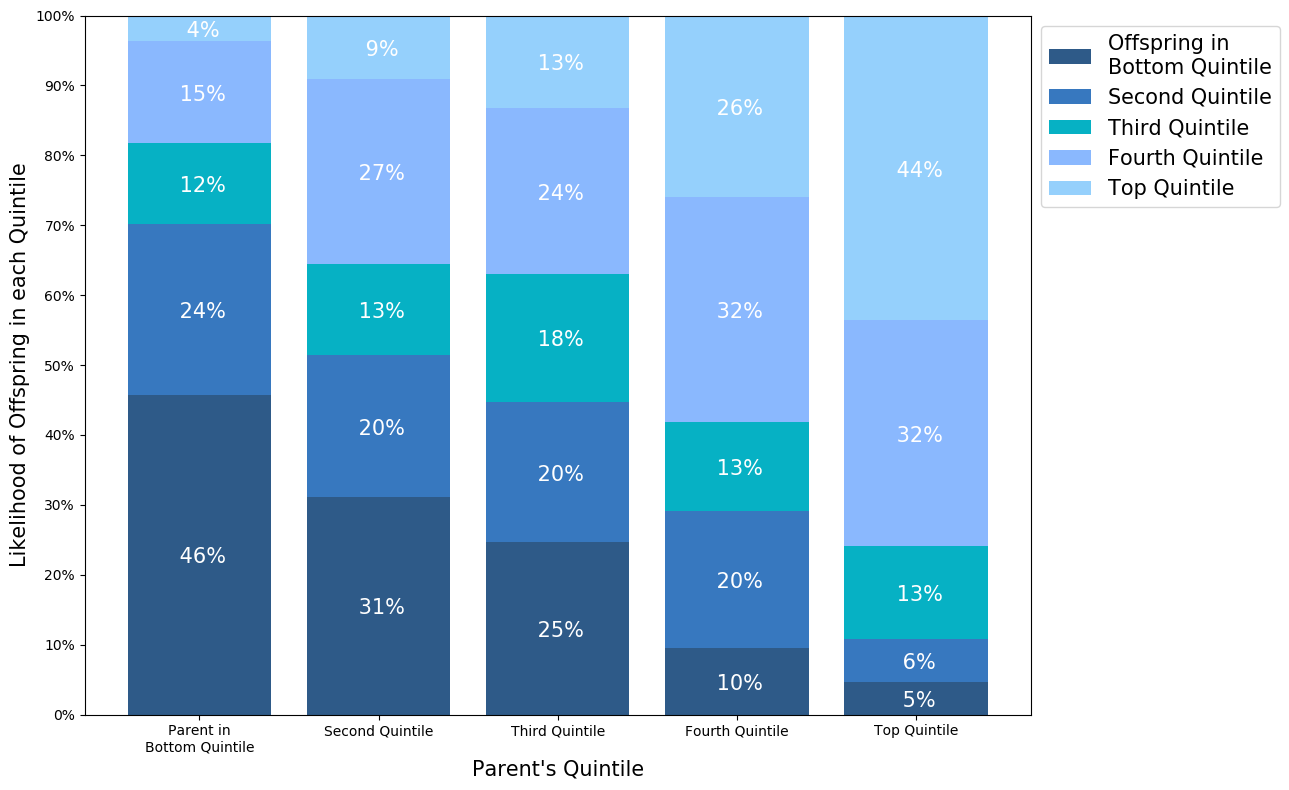

In [416]:
plt.figure(figsize=(13,8))
tree.plot_mobility(transposed_step_percentile)
plt.tight_layout()
plt.savefig('figures/galton_mobility.png', dpi=300)
plt.show()

R^2 of 0.81 between Galton's data and the proposed model. (Correlations are calculated in the correlation sheet.)

In [414]:
transposed_step_percentile

[[0.4573170731707317,
  0.3107344632768362,
  0.2465753424657534,
  0.09523809523809523,
  0.04697986577181208],
 [0.24390243902439024,
  0.2033898305084746,
  0.2009132420091324,
  0.19576719576719576,
  0.06040268456375839],
 [0.11585365853658537,
  0.12994350282485875,
  0.182648401826484,
  0.12698412698412698,
  0.1342281879194631],
 [0.14634146341463414,
  0.2655367231638418,
  0.2374429223744292,
  0.32275132275132273,
  0.3221476510067114],
 [0.036585365853658534,
  0.0903954802259887,
  0.1324200913242009,
  0.25925925925925924,
  0.436241610738255]]

In [420]:
galton.Height

0      73.2
1      69.2
2      69.0
3      69.0
4      73.5
       ... 
893    68.5
894    67.7
895    64.0
896    63.5
897    63.0
Name: Height, Length: 898, dtype: float64

In [80]:
galton.head()

,Family,Father,Mother,Gender,Height,Kids,NormHeight
0,1,78.5,67.0,M,73.2,4,1.509041
1,1,78.5,67.0,F,69.2,4,2.147322
2,1,78.5,67.0,F,69.0,4,2.062945
3,1,78.5,67.0,F,69.0,4,2.062945
4,2,75.5,66.5,M,73.5,4,1.623040


In [81]:
# for row in galton.groupby(['Family'], sort=False).NormHeight.mean():
#     print(row)

### One offspring distribution

In [216]:
family_ids = galton.Family.unique().tolist()

In [217]:
heights_by_family = list()
for family_id in family_ids:
    heights_by_family.append(np.array(galton.loc[galton.Family == \
                                                 family_id].NormHeight.tolist()))

In [218]:
mean_heights_by_family = galton.groupby(['Family'], sort=False).NormHeight.mean().tolist()

In [219]:
adj_heights_by_family = heights_by_family.copy()

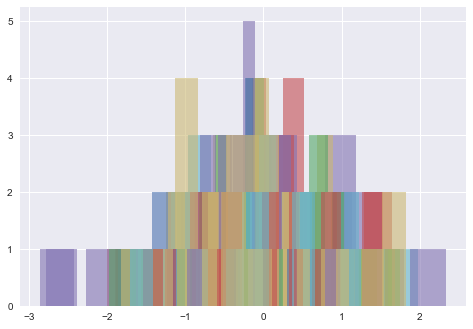

In [220]:
for i in range(len(heights_by_family)):
    adj_heights_by_family[i] -= mean_heights_by_family[i]

for one_offspring_dist in adj_heights_by_family:
    plt.hist(one_offspring_dist, alpha=0.6)
#     sns.distplot(one_offspring_dist)
#     plt.show()

### Tanner method to normalize heights
In this method, we simply add to female heights the difference between the average male height and the average female height. We do this separately for parents and adult children. 

In [173]:
galton_tanner = galton.copy()

In [174]:
galton_tanner.drop(columns='NormHeight', inplace=True)

In [175]:
galton_tanner.Father.mean()

69.23285077950997

In [176]:
galton_tanner.Mother.mean()

64.08440979955456

In [177]:
mother_adj = galton_tanner.Father.mean() - galton_tanner.Mother.mean()

In [178]:
mother_adj

5.14844097995541

In [179]:
galton_tanner['Mid_parental'] = (galton_tanner.Father + (galton_tanner.Mother + mother_adj)) / 2

In [180]:
galton_tanner.loc[galton_tanner.Gender == 'M'].Height.mean()

69.22881720430114

In [181]:
galton_tanner.loc[galton_tanner.Gender == 'F'].Height.mean()

64.11016166281759

In [182]:
daughter_adj = galton_tanner.loc[galton_tanner.Gender == 'M'].Height.mean() - \
               galton_tanner.loc[galton_tanner.Gender == 'F'].Height.mean()

In [183]:
daughter_adj

5.118655541483548

In [184]:
def tanner_adj_offspring(row):
    if row.Gender == 'F':
        return row.Height + daughter_adj
    elif row.Gender == 'M':
        return row.Height

In [185]:
galton_tanner['Norm_height'] = galton_tanner.apply(tanner_offspring, axis='columns')

In [186]:
galton_tanner['Mother_adj'] = galton_tanner.Mother + mother_adj

In [187]:
comb_parents = np.array(galton_tanner.Father.tolist() + galton_tanner.Mother_adj.tolist())

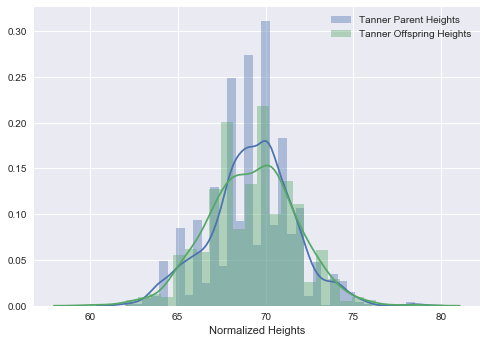

In [188]:
sns.distplot(comb_parents, label='Tanner Parent Heights')
sns.distplot(galton_tanner.Norm_height, label='Tanner Offspring Heights')
plt.legend()
plt.xlabel('Normalized Heights')
plt.show()

In [189]:
galton_tanner.Norm_height.mean()

69.22881720430071

In [190]:
comb_parents.mean()

69.23285077951

In [191]:
percent_error(approx=galton_tanner.Norm_height.mean(), exact=comb_parents.mean(), digits=5)

0.00583%


In [192]:
galton_tanner.Norm_height.std()

2.5076225239399097

In [193]:
comb_parents.std()

2.3887033038745313

In [194]:
percent_error(approx=galton_tanner.Norm_height.std(), exact=comb_parents.std(), digits=4)

4.9784%


In [406]:
galton_tanner.Norm_height.std() / comb_parents.std()

1.0497840061896715

In [195]:
galton_tanner.loc[galton_tanner.Gender == 'F'].Height.std()

2.370319602944069

In [196]:
galton_tanner.Mother.std()

2.3070252210018625

In [197]:
galton_tanner.loc[galton_tanner.Gender == 'M'].Height.std()

2.6315942826866188

In [198]:
galton_tanner.Father.std()

2.4702558107108206

In [199]:
galton_tanner.corr()

,Father,Mother,Height,Kids,Mid_parental,Norm_height,Mother_adj
Father,1.000000,0.073665,0.275355,-0.160023,0.753908,0.421136,0.073665
Mother,0.073665,1.000000,0.201655,-0.020030,0.710731,0.324476,1.000000
Height,0.275355,0.201655,1.000000,-0.126910,0.327074,0.699883,0.201655
Kids,-0.160023,-0.020030,-0.126910,1.000000,-0.126072,-0.116775,-0.020030
Mid_parental,0.753908,0.710731,0.327074,-0.126072,1.000000,0.510816,0.710731
Norm_height,0.421136,0.324476,0.699883,-0.116775,0.510816,1.000000,0.324476
Mother_adj,0.073665,1.000000,0.201655,-0.020030,0.710731,0.324476,1.000000


In [200]:
tanner_r = 0.510816

In [201]:
print(galton_tanner.Kids.mean())
print(galton_tanner.Kids.std())

6.135857461024499
2.6851558148468047


In [202]:
mid_parental_mean = galton_tanner.Mid_parental.mean()
mid_parental_sd = galton_tanner.Mid_parental.std()
norm_height_mean = galton_tanner.Norm_height.mean()
norm_height_sd = galton_tanner.Norm_height.std()

In [203]:
galton_tanner['Pred_Norm_height'] = ((tanner_r * ((galton_tanner.Mid_parental - \
                                        mid_parental_mean) / mid_parental_sd)) \
                                        * norm_height_sd) + norm_height_mean

In [204]:
galton_tanner

,Family,Father,Mother,Gender,Height,Kids,Mid_parental,Norm_height,Mother_adj,Pred_Norm_height
0,1,78.5,67.0,M,73.2,4,75.32422,73.200000,72.148441,73.684896
1,1,78.5,67.0,F,69.2,4,75.32422,74.318656,72.148441,73.684896
2,1,78.5,67.0,F,69.0,4,75.32422,74.118656,72.148441,73.684896
3,1,78.5,67.0,F,69.0,4,75.32422,74.118656,72.148441,73.684896
4,2,75.5,66.5,M,73.5,4,73.57422,73.500000,71.648441,72.404702
...,...,...,...,...,...,...,...,...,...,...
893,136A,68.5,65.0,M,68.5,8,69.32422,68.500000,70.148441,69.295658
894,136A,68.5,65.0,M,67.7,8,69.32422,67.700000,70.148441,69.295658
895,136A,68.5,65.0,F,64.0,8,69.32422,69.118656,70.148441,69.295658
896,136A,68.5,65.0,F,63.5,8,69.32422,68.618656,70.148441,69.295658


In [213]:
tanner_preds = galton_tanner.groupby('Family', sort=False).Pred_Norm_height.mean().tolist()

In [229]:
tanner_adj_norm_heights = list()
for family_id in family_ids:
    tanner_adj_norm_heights.append(np.array(galton_tanner.loc[galton_tanner.Family == \
                                                 family_id].Norm_height.tolist()))

for i in range(len(tanner_adj_norm_heights)):
    tanner_adj_norm_heights[i] -= tanner_preds[i]

one_dists = tanner_adj_norm_heights

About the average for each

In [232]:
stds_avg = list()
for one_dist in one_dists:
    stds_avg.append(one_dist.std())

In [238]:
sum(stds_avg) / len(stds_avg)

1.2652153308973186

In [246]:
comb_parents.std()

2.3887033038745313

In [247]:
1.2652153308973186 / 2.3887033038745313

0.5296661702795448

About zero for each

In [256]:
stds_0 = list()
for one_dist in one_dists:
    sum_sq = 0
    n = len(one_dist)
    for i in range(n):
        sum_sq += one_dist[i] ** 2
    stds_0.append((sum_sq / n) ** 0.5)

In [257]:
sum(stds_0) / len(stds_0)

1.950707031967024

In [258]:
1.950707031967024 / 2.3887033038745313

0.8166384786268486

Combined one distributions

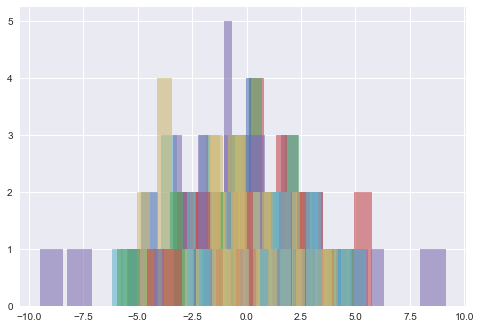

In [259]:
for one_dist in one_dists:
    plt.hist(one_dist, alpha=0.6)

In [265]:
all_one_dists = list()
for one_dist in one_dists:
    for i in range(len(one_dist)):
        all_one_dists.append(one_dist[i])
all_one_dists = np.array(all_one_dists)

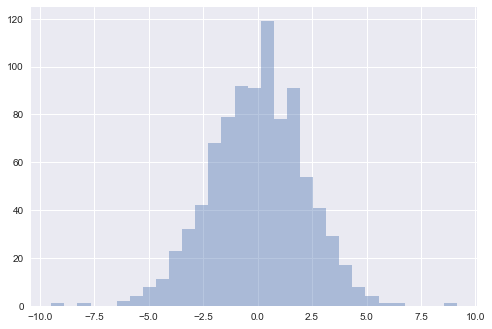

In [270]:
sns.distplot(all_one_dists, kde=False)

In [267]:
all_one_dists.mean()

8.567183092615711e-13

In [271]:
one_sd = all_one_dists.std()
one_sd

2.1545779011942026

In [269]:
2.1545779011942026 / 2.3887033038745313

0.9019864031248368

In [272]:
def f_norm(x, mean, sd):
    return (1 / (sd * ((2 * np.pi) ** 0.5))) * np.exp(-1 * ((((x - mean) / sd) ** 2) / 2))

In [280]:
x = np.arange(-10, 10, 0.1)

In [281]:
one_norm = list()
for x_value in x:
    one_norm.append(f_norm(x_value, 0, one_sd))
one_norm = np.array(one_norm)

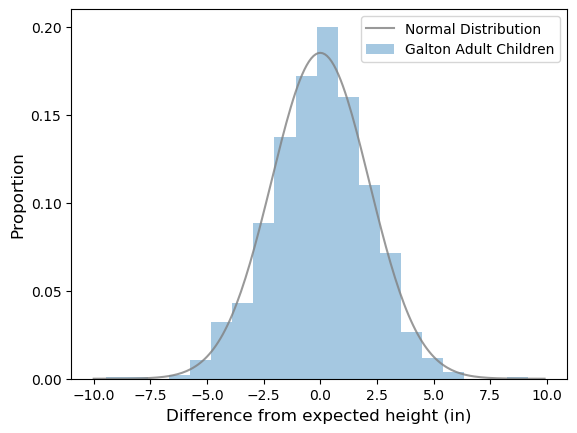

In [408]:
figures_file = 'figures/' 
plt.hist(all_one_dists, bins=20, alpha=0.4, density=True, label='Galton Adult Children') \
                                        # , color='grey'
plt.plot(x, one_norm, alpha=0.8, label='Normal Distribution', color='grey')
# plt.scatter(x, one_norm, s=6, alpha=0.6, label='Normal Distribution', color='grey') 
plt.ylim(0, 0.21)
plt.xlabel('Difference from expected height (in)', fontsize=12)
# plt.grid()
hfont = {'fontname':'Helvetica'}
plt.ylabel('Proportion', fontsize=12)
# plt.tight_layout()
plt.yticks(np.arange(0, 0.25, 0.05))
plt.legend(fontsize=10)
plt.savefig(figures_file + 'galton_tanner_one_dists.png', dpi=300)
plt.show()

In [348]:
plt.style.use('default')